In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, matthews_corrcoef

In [190]:
file_path = 'raw_data_phase_1_07_26_2024 (3).csv'  # Replace with your Excel file's path

df = pd.read_csv(file_path)

## Feature Space

In [3]:
feature_cols1 = [f'y2_{i}' for i in range(1, 41)]

In [135]:
# Prepare the data
feature_cols = [f'y2_{i}' for i in range(1, 81)]
feature_cols1 = [f'y2_{i}' for i in range(1, 41)]
# data = df[feature_cols,'plate']
time_columns = [f'elapsed_time_{i}' for i in range(2, 82)]
columns_to_select = feature_cols + ['plate']+['mutant_ID']+time_columns+['light_regime']



data = df[columns_to_select]


data2 = data[data[feature_cols].isnull().any(axis=1)]  # Rows with nulls in feature_cols
data1 = data[data[feature_cols].notnull().all(axis=1)]  # Rows with no nulls in feature_cols
data2=data2.dropna(axis=1, how='all')

In [180]:
scaler1 = StandardScaler()
data1_centered = scaler1.fit_transform(data1[feature_cols])

m = np.dot(data1_centered.T, data1_centered)  # Equivalent to crossprod(sponge.X)
U, S, Vt = np.linalg.svd(m, full_matrices=False)

a1 = U[:, 0:2] 
# Project data onto the singular vector
t1 = np.dot(data1_centered, a1) / np.linalg.norm(a1,axis=0)  
# Compute the contribution along the vectors / Find the projection coefficient of data1_centered along t1
c1 = np.dot(data1_centered.T, t1) @ np.linalg.pinv(np.dot(t1.T, t1))
# Subtract the first singular component from the data
data1_corrected = data1_centered - t1 @ c1.T
# Add back the mean and standard deviation
data1_corrected = scaler1.inverse_transform(data1_corrected)

In [182]:
scaler2 = StandardScaler()
data2_centered = scaler2.fit_transform(data2[feature_cols1])

m = np.dot(data2_centered.T, data2_centered)  # Equivalent to crossprod(sponge.X)
U, S, Vt = np.linalg.svd(m, full_matrices=False)

a1 = U[:, 0:2] 
# Project data onto the singular vector
t1 = np.dot(data2_centered, a1) / np.linalg.norm(a1,axis=0)  
# Compute the contribution along the vectors / Find the projection coefficient of data1_centered along t1
c1 = np.dot(data2_centered.T, t1) @ np.linalg.pinv(np.dot(t1.T, t1))
# Subtract the first singular component from the data
data2_corrected = data2_centered - t1 @ c1.T
# Add back the mean and standard deviation
data2_corrected = scaler2.inverse_transform(data2_corrected)

In [171]:
data1[feature_cols] = data1_corrected

data2[feature_cols1] = data2_corrected

C:\Users\ruisi\AppData\Local\Temp\ipykernel_46060\636999801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[feature_cols] = data1_corrected


In [173]:
csv_file_path = "SVD_feature.csv"  # Specify the desired file path
df3.to_csv(csv_file_path, index=False)

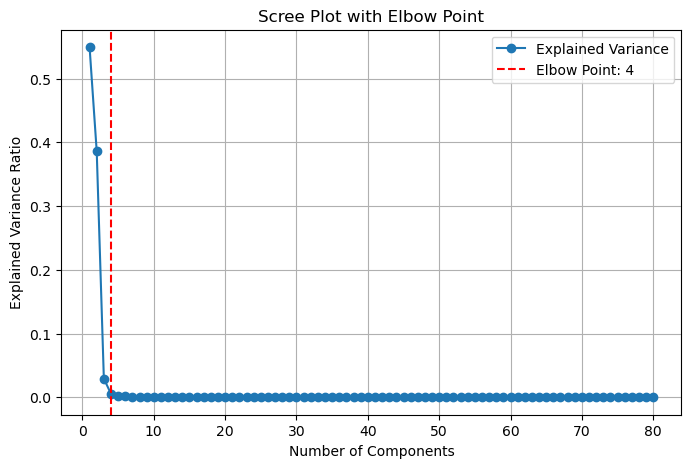

In [138]:
from kneed import KneeLocator

# Find the Elbow Point
explained_variance = (S) / np.sum(S)
knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve="convex", direction="decreasing")
elbow = knee_locator.knee

# Plot Scree Plot with Elbow Point
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="-", label="Explained Variance")
plt.axvline(elbow, color='r', linestyle='dashed', label=f"Elbow Point: {elbow}")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot with Elbow Point")
plt.legend()
plt.grid()
plt.show()

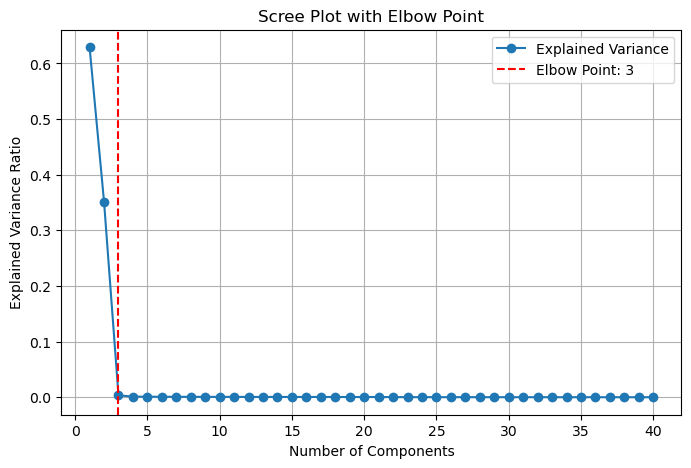

In [141]:
from kneed import KneeLocator

# Find the Elbow Point
explained_variance = (S) / np.sum(S)
knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve="convex", direction="decreasing")
elbow = knee_locator.knee

# Plot Scree Plot with Elbow Point
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="-", label="Explained Variance")
plt.axvline(elbow, color='r', linestyle='dashed', label=f"Elbow Point: {elbow}")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot with Elbow Point")
plt.legend()
plt.grid()
plt.show()

## Sample space (only on WT)

In [225]:
# Prepare the data
feature_cols = [f'y2_{i}' for i in range(1, 81)]
feature_cols1 = [f'y2_{i}' for i in range(1, 41)]
# data = df[feature_cols,'plate']
time_columns = [f'elapsed_time_{i}' for i in range(2, 82)]
columns_to_select = feature_cols + ['plate']+['mutant_ID']+time_columns+['light_regime']

data = df[columns_to_select]
data=data[data['mutant_ID']=='WT']

data2 = data[data[feature_cols].isnull().any(axis=1)]  # Rows with nulls in feature_cols
data1 = data[data[feature_cols].notnull().all(axis=1)]  # Rows with no nulls in feature_cols
data2=data2.dropna(axis=1, how='all')

In [226]:
scaler1 = StandardScaler()
data1_centered = scaler1.fit_transform(data1[feature_cols])

U1, S1, Vt = np.linalg.svd(data1_centered, full_matrices=False)
a1 = U1[:, 0:3] 
# Project data onto the singular vector
t1 = np.dot(data1_centered.T, a1) / np.linalg.norm(a1,axis=0)  
# Compute the contribution along the vectors / Find the projection coefficient of data1_centered along t1
c1 = np.dot(data1_centered, t1) @ np.linalg.pinv(np.dot(t1.T, t1))
# Subtract the first singular component from the data
# data1_corrected = data1_centered - c1 @ t1.T
data1_corrected = data1_centered - a1 @ a1.T@data1_centered
# Add back the mean and standard deviation
data1_corrected = scaler1.inverse_transform(data1_corrected)

In [227]:

scaler2 = StandardScaler()
data2_centered = scaler2.fit_transform(data2[feature_cols1])

U2, S2, Vt = np.linalg.svd(data2_centered, full_matrices=False)
a1 = U2[:, 0:3]  #  singular vector
# Project data onto the first singular vector
t1 = np.dot(data2_centered.T, a1) / np.linalg.norm(a1,axis=0)  
# Compute the contribution along the features
# Find the projection coefficient of data1_centered along t1
c1 = np.dot(data2_centered, t1) @ np.linalg.pinv(np.dot(t1.T, t1))

# Subtract the first singular component from the data
# data2_corrected = data2_centered - c1 @ t1.T
data2_corrected = data2_centered -a1 @ a1.T@data2_centered
# Add back the mean and standard deviation
data2_corrected = scaler2.inverse_transform(data2_corrected)

In [228]:
data1[feature_cols] = data1_corrected

data2[feature_cols1] = data2_corrected

C:\Users\ruisi\AppData\Local\Temp\ipykernel_46060\636999801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[feature_cols] = data1_corrected


In [229]:
df3 = pd.concat([data1 , data2 ], axis=0, join='outer')
df3

,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,...,elapsed_time_73,elapsed_time_74,elapsed_time_75,elapsed_time_76,elapsed_time_77,elapsed_time_78,elapsed_time_79,elapsed_time_80,elapsed_time_81,light_regime
0,0.400467,0.432849,0.236065,0.568310,0.353805,0.431253,0.198207,0.565491,0.374956,0.411081,...,18.554167,18.571111,19.054722,19.071667,19.555278,19.572222,20.056944,20.073889,20.329722,1min-1min
1,0.378928,0.417113,0.240102,0.558878,0.360440,0.380581,0.241055,0.559797,0.391953,0.397706,...,18.554167,18.571111,19.054722,19.071667,19.555278,19.572222,20.056944,20.073889,20.329722,1min-1min
2,0.383437,0.411760,0.264175,0.537847,0.371244,0.416120,0.244724,0.546696,0.403777,0.398459,...,18.554167,18.571111,19.054722,19.071667,19.555278,19.572222,20.056944,20.073889,20.329722,1min-1min
3,0.386908,0.409205,0.252046,0.544815,0.375712,0.400206,0.235916,0.546755,0.371408,0.392665,...,18.554167,18.571111,19.054722,19.071667,19.555278,19.572222,20.056944,20.073889,20.329722,1min-1min
4,0.350162,0.411754,0.260365,0.558834,0.365821,0.408272,0.253078,0.552363,0.368372,0.397198,...,18.554167,18.571111,19.054722,19.071667,19.555278,19.572222,20.056944,20.073889,20.329722,1min-1min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52670,0.301302,0.306631,0.299868,0.293383,0.419510,0.421236,0.407718,0.414321,0.282938,0.243599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2h-2h
52709,0.322350,0.318683,0.281474,0.306189,0.407737,0.420236,0.413517,0.420131,0.264056,0.252317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2h-2h
53961,0.293863,0.296993,0.309533,0.294751,0.450057,0.457665,0.435992,0.405982,0.272179,0.246690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20h_ML
54240,0.297924,0.293277,0.294627,0.281024,0.434327,0.426613,0.445330,0.414327,0.257330,0.254205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20h_ML


In [231]:
csv_file_path = "SVD_sample4.csv"  # Specify the desired file path
df3.to_csv(csv_file_path, index=False)

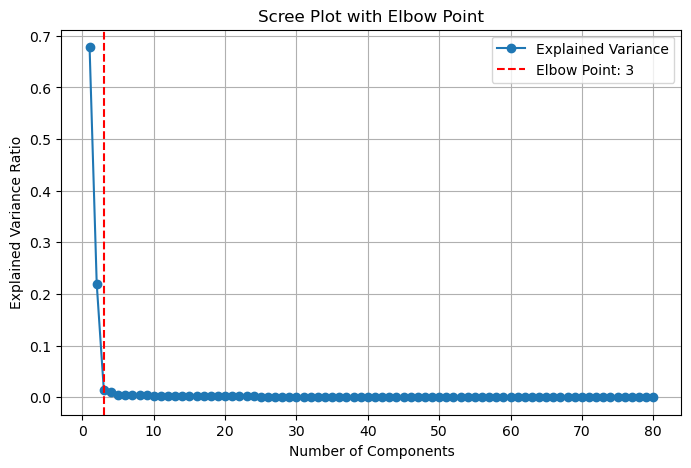

In [203]:
from kneed import KneeLocator
explained_variance = (S1 ** 2) / np.sum(S1 ** 2)
knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve="convex", direction="decreasing")
elbow = knee_locator.knee
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="-", label="Explained Variance")
plt.axvline(elbow, color='r', linestyle='dashed', label=f"Elbow Point: {elbow}")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot with Elbow Point")
plt.legend()
plt.grid()
plt.show()

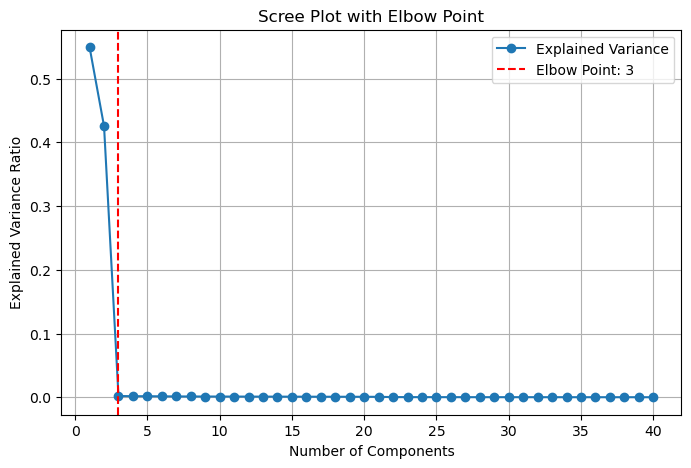

In [204]:
from kneed import KneeLocator
explained_variance = (S2 ** 2) / np.sum(S2 ** 2)
knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve="convex", direction="decreasing")
elbow = knee_locator.knee
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="-", label="Explained Variance")
plt.axvline(elbow, color='r', linestyle='dashed', label=f"Elbow Point: {elbow}")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot with Elbow Point")
plt.legend()
plt.grid()
plt.show()

## Sample space (on all mutant)

In [232]:
# Prepare the data
feature_cols = [f'y2_{i}' for i in range(1, 81)]
feature_cols1 = [f'y2_{i}' for i in range(1, 41)]
# data = df[feature_cols,'plate']
time_columns = [f'elapsed_time_{i}' for i in range(2, 82)]
columns_to_select = feature_cols + ['plate']+['mutant_ID']+time_columns+['light_regime']

data = df[columns_to_select]

data2 = data[data[feature_cols].isnull().any(axis=1)]  # Rows with nulls in feature_cols
data1 = data[data[feature_cols].notnull().all(axis=1)]  # Rows with no nulls in feature_cols
data2=data2.dropna(axis=1, how='all')

In [233]:
scaler1 = StandardScaler()
data1_centered = scaler1.fit_transform(data1[feature_cols])

U1, S1, Vt = np.linalg.svd(data1_centered, full_matrices=False)
a1 = U1[:, 0:3] 
# Project data onto the singular vector
t1 = np.dot(data1_centered.T, a1) / np.linalg.norm(a1,axis=0)  
# Compute the contribution along the vectors / Find the projection coefficient of data1_centered along t1
c1 = np.dot(data1_centered, t1) @ np.linalg.pinv(np.dot(t1.T, t1))
# Subtract the first singular component from the data
# data1_corrected = data1_centered - c1 @ t1.T
data1_corrected = data1_centered - a1 @ a1.T@data1_centered
# Add back the mean and standard deviation
data1_corrected = scaler1.inverse_transform(data1_corrected)

In [239]:

scaler2 = StandardScaler()
data2_centered = scaler2.fit_transform(data2[feature_cols1])

U2, S2, Vt = np.linalg.svd(data2_centered, full_matrices=False)
a1 = U2[:, 0:2]  #  singular vector
# Project data onto the first singular vector
t1 = np.dot(data2_centered.T, a1) / np.linalg.norm(a1,axis=0)  
# Compute the contribution along the features
# Find the projection coefficient of data1_centered along t1
c1 = np.dot(data2_centered, t1) @ np.linalg.pinv(np.dot(t1.T, t1))

# Subtract the first singular component from the data
# data2_corrected = data2_centered - c1 @ t1.T
data2_corrected = data2_centered -a1 @ a1.T@data2_centered
# Add back the mean and standard deviation
data2_corrected = scaler2.inverse_transform(data2_corrected)

In [240]:
data1[feature_cols] = data1_corrected

data2[feature_cols1] = data2_corrected

C:\Users\ruisi\AppData\Local\Temp\ipykernel_46060\636999801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[feature_cols] = data1_corrected


In [241]:
df3 = pd.concat([data1 , data2 ], axis=0, join='outer')
df3

,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,...,elapsed_time_73,elapsed_time_74,elapsed_time_75,elapsed_time_76,elapsed_time_77,elapsed_time_78,elapsed_time_79,elapsed_time_80,elapsed_time_81,light_regime
0,0.382223,0.415796,0.229551,0.538285,0.337280,0.413385,0.193790,0.535591,0.358274,0.392155,...,18.554167,18.571111,19.054722,19.071667,19.555278,19.572222,20.056944,20.073889,20.329722,1min-1min
1,0.357477,0.404955,0.230989,0.531048,0.338780,0.366859,0.233038,0.531736,0.370137,0.383119,...,18.554167,18.571111,19.054722,19.071667,19.555278,19.572222,20.056944,20.073889,20.329722,1min-1min
2,0.351163,0.415192,0.251554,0.517095,0.336927,0.416923,0.231208,0.524829,0.369283,0.399321,...,18.554167,18.571111,19.054722,19.071667,19.555278,19.572222,20.056944,20.073889,20.329722,1min-1min
3,0.354787,0.413676,0.239004,0.525420,0.340093,0.401215,0.220395,0.525436,0.336453,0.394863,...,18.554167,18.571111,19.054722,19.071667,19.555278,19.572222,20.056944,20.073889,20.329722,1min-1min
4,0.327650,0.401785,0.249983,0.532714,0.341635,0.395927,0.242403,0.525325,0.344581,0.384852,...,18.554167,18.571111,19.054722,19.071667,19.555278,19.572222,20.056944,20.073889,20.329722,1min-1min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54296,0.314296,0.278895,0.268416,0.278442,0.410385,0.420437,0.397013,0.400109,0.275066,0.263477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20h_ML
54297,0.280072,0.297009,0.280313,0.313441,0.411163,0.384059,0.412231,0.387674,0.261884,0.267416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20h_ML
54298,0.291934,0.287938,0.281360,0.281610,0.416640,0.422728,0.405365,0.378674,0.274328,0.267528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20h_ML
54299,0.287500,0.289240,0.262762,0.286284,0.415114,0.418900,0.398046,0.394553,0.284911,0.282580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20h_ML


In [242]:
csv_file_path = "SVD_sample_new.csv"  # Specify the desired file path
df3.to_csv(csv_file_path, index=False)

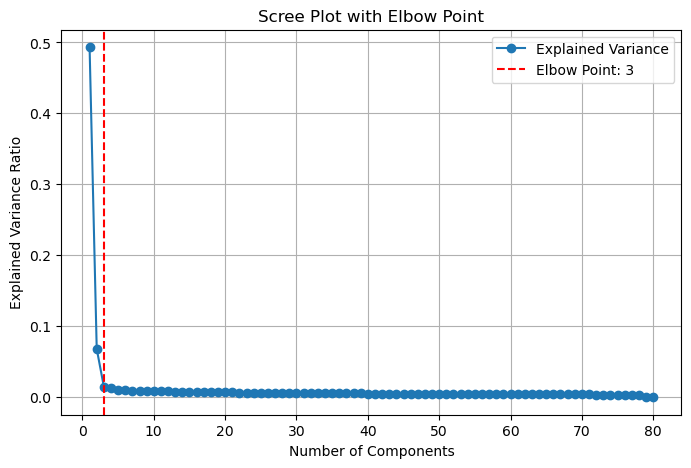

In [90]:
from kneed import KneeLocator
explained_variance = (S1 ** 2) / np.sum(S1 ** 2)
knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve="convex", direction="decreasing")
elbow = knee_locator.knee
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="-", label="Explained Variance")
plt.axvline(elbow, color='r', linestyle='dashed', label=f"Elbow Point: {elbow}")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot with Elbow Point")
plt.legend()
plt.grid()
plt.show()

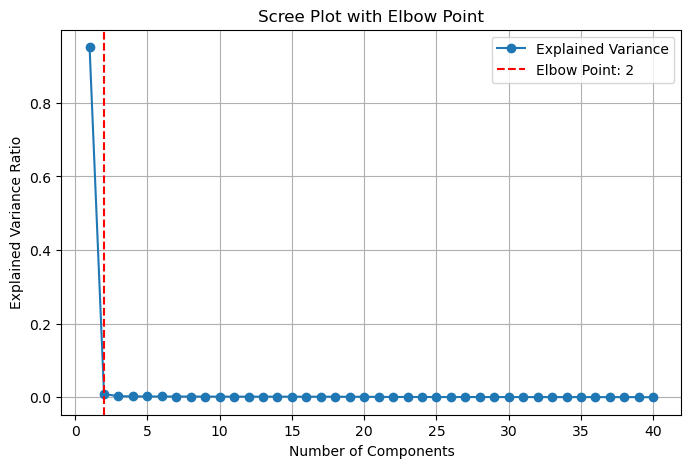

In [131]:
from kneed import KneeLocator

# Find the Elbow Point
explained_variance = (S2 ** 2) / np.sum(S2 ** 2)
knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve="convex", direction="decreasing")
elbow = knee_locator.knee

# Plot Scree Plot with Elbow Point
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="-", label="Explained Variance")
plt.axvline(elbow, color='r', linestyle='dashed', label=f"Elbow Point: {elbow}")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot with Elbow Point")
plt.legend()
plt.grid()
plt.show()
